# **Cryo-Qubit Python Testbench with AI Logic**

 Python-based testbench designed to simulate and analyze qubit switching behavior, phase transitions, and intelligent detection of phenomena like susceptibility changes and zero-bias peaks (MZM indicators).

 This modular architecture enables startups, research labs, and system developers to rapidly prototype, test, and scale quantum computing and communication hardware operating at cryogenic temperatures. It supports superconducting qubits, trapped ions, artificial atoms, cold atoms, and BEC condensates, offering a plug-and-play toolkit for lab-grade deployment.

In [1]:
# Install required libraries (only once per session)
!pip install scikit-learn seaborn

📌 Zero Bias Anomaly Detected: True
📊 Max Susceptibility: 3.88e-05 A/V


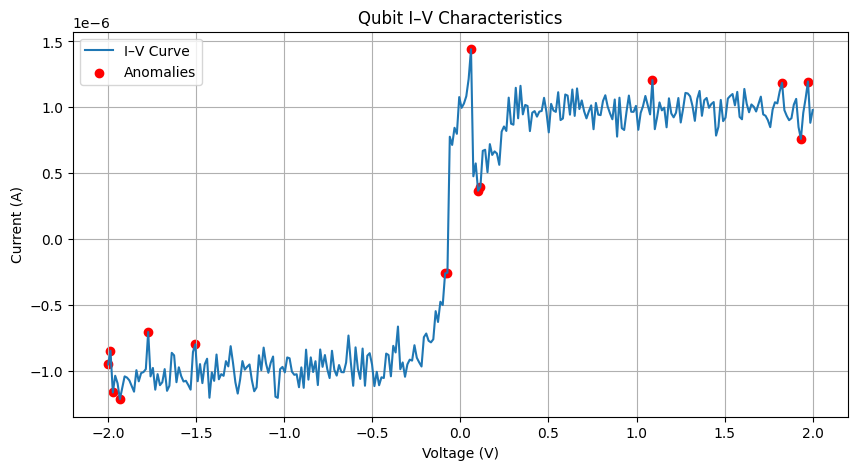

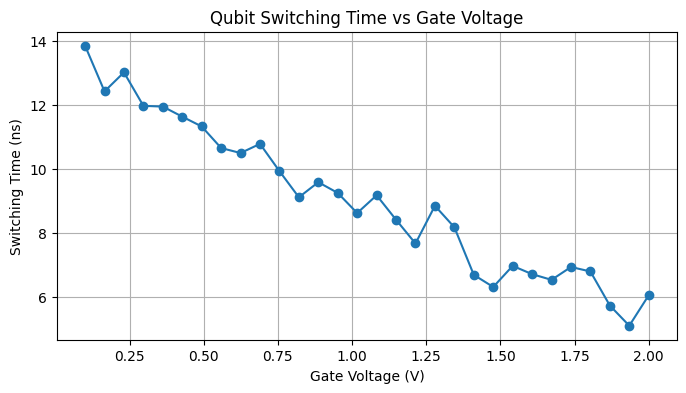

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import pandas as pd

# Simulated Hardware Data Generator
class HardwareSimulator:
    def __init__(self, points=300):
        self.points = points

    def generate_iv_data(self):
        V = np.linspace(-2, 2, self.points)
        I = 1e-6 * np.tanh(5 * V) + np.random.normal(0, 1e-7, self.points)
        I[145:155] += 1e-6  # Simulate zero-bias anomaly
        return V, I

    def switching_time(self, Vg):
        return 5 + 10 * np.exp(-Vg) + np.random.normal(0, 0.5, len(Vg))

    def susceptibility(self, V, I):
        return np.gradient(I, V)

# Measurement Functions
class MeasurementSuite:
    def __init__(self, V, I):
        self.V = V
        self.I = I

    def detect_zero_bias_peak(self):
        idx_zero = np.argmin(np.abs(self.V))
        return np.abs(self.I[idx_zero]) > 1e-6

    def compute_susceptibility(self):
        return np.gradient(self.I, self.V)

# AI-Based Phase Change Detector
class PhaseChangeAI:
    def __init__(self, V, I):
        self.V = V
        self.I = I

    def detect_phase_anomalies(self):
        data = np.vstack([self.V, self.I]).T
        model = IsolationForest(contamination=0.05)
        outliers = model.fit_predict(data)
        return outliers == -1

# Visualization
class Visualizer:
    def plot_iv_curve(self, V, I, anomalies=None):
        plt.figure(figsize=(10, 5))
        plt.plot(V, I, label='I–V Curve')
        if anomalies is not None:
            plt.scatter(V[anomalies], I[anomalies], color='r', label='Anomalies')
        plt.xlabel("Voltage (V)")
        plt.ylabel("Current (A)")
        plt.title("Qubit I–V Characteristics")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_switching_time(self, Vg, Ts):
        plt.figure(figsize=(8, 4))
        plt.plot(Vg, Ts, marker='o')
        plt.title("Qubit Switching Time vs Gate Voltage")
        plt.xlabel("Gate Voltage (V)")
        plt.ylabel("Switching Time (ns)")
        plt.grid(True)
        plt.show()

# Run Testbench
sim = HardwareSimulator()
V, I = sim.generate_iv_data()
suite = MeasurementSuite(V, I)
ai = PhaseChangeAI(V, I)
viz = Visualizer()

# Compute metrics
zero_bias_flag = suite.detect_zero_bias_peak()
sus = suite.compute_susceptibility()
anomalies = ai.detect_phase_anomalies()

# Print results
print(f"📌 Zero Bias Anomaly Detected: {zero_bias_flag}")
print(f"📊 Max Susceptibility: {np.max(np.abs(sus)):.2e} A/V")

# Visualize
viz.plot_iv_curve(V, I, anomalies)

# Switching Time Sweep
Vg = np.linspace(0.1, 2.0, 30)
Ts = sim.switching_time(Vg)
viz.plot_switching_time(Vg, Ts)


**Concept and execution by Bhadale IT, code generated by ChatGPT**